In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[14,8])

x=np.linspace(stats.norm.cdf(0.01),stats.norm.cdf(0.99),100)
print(x)

rhoarray=list([0,0.4,0.6,0.8,1])
sigmarr=np.linspace(.1,10,num=200)
err=np.zeros((len(rhoarray),len(sigmarr)))
#import pdb; pdb.set_trace()
for i in range(0,len(rhoarray)):
    for j in range(0,len(sigmarr)):
        err[i,j]=stats.norm.cdf(-1/(np.sqrt(2)*sigmarr[j]*np.sqrt(1+rhoarray[i])))
    ax.plot(sigmarr,err[i,:],label='Optimal Classification error vs sigma for rho='+str(rhoarray[i]))
    ax.legend()
plt.title('Optimal Classification Error vs Sigma')
plt.ylabel('Optimal Classification Error')
plt.xlabel('Sigma')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw1b.png')


[0.50398936 0.50737242 0.51075549 0.51413856 0.51752162 0.52090469
 0.52428776 0.52767082 0.53105389 0.53443695 0.53782002 0.54120309
 0.54458615 0.54796922 0.55135229 0.55473535 0.55811842 0.56150149
 0.56488455 0.56826762 0.57165069 0.57503375 0.57841682 0.58179989
 0.58518295 0.58856602 0.59194909 0.59533215 0.59871522 0.60209829
 0.60548135 0.60886442 0.61224748 0.61563055 0.61901362 0.62239668
 0.62577975 0.62916282 0.63254588 0.63592895 0.63931202 0.64269508
 0.64607815 0.64946122 0.65284428 0.65622735 0.65961042 0.66299348
 0.66637655 0.66975962 0.67314268 0.67652575 0.67990881 0.68329188
 0.68667495 0.69005801 0.69344108 0.69682415 0.70020721 0.70359028
 0.70697335 0.71035641 0.71373948 0.71712255 0.72050561 0.72388868
 0.72727175 0.73065481 0.73403788 0.73742095 0.74080401 0.74418708
 0.74757014 0.75095321 0.75433628 0.75771934 0.76110241 0.76448548
 0.76786854 0.77125161 0.77463468 0.77801774 0.78140081 0.78478388
 0.78816694 0.79155001 0.79493308 0.79831614 0.80169921 0.8050

[[1.  0.2]
 [0.2 1. ]]


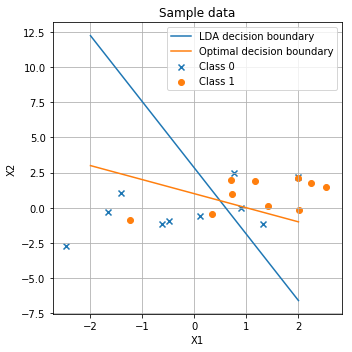

In [15]:
sigma=1
rho=0.2
u1=np.array([0,0])
u2=np.array([1,1])
cov=np.array([[sigma**2,rho*sigma**2],[rho*sigma**2,sigma**2]])
print(cov)

x1=np.random.multivariate_normal(means1,cov,10)
x2=np.random.multivariate_normal(means2,cov,10)
xs=np.concatenate((x1,x2),axis=0)

#designed lda classifier
smean1=np.mean(x1,axis=0)
smean2=np.mean(x2,axis=0)
scov1=np.cov(x1.T,rowvar=True)
scov2=np.cov(x2.T,rowvar=True)
scov=(scov1+scov2)/2
scov_inv=np.linalg.inv(scov)
a_lda=scov_inv.dot((smean2-smean1))
b_lda=-0.5*((smean2-smean1).dot(scov_inv)).dot((smean1+smean2))
x1_lda=np.linspace(-2,2,num=20)
y_lda=-a_lda[0]/a_lda[1]*x1_lda-b_lda/a_lda[1]

#optimal classifier
cov_inv=np.linalg.inv(cov)
a_opt=cov_inv.dot((u2-u1))
b_opt=-0.5*((u2-u1).dot(cov_inv)).dot((u1+u2))
x1_opt=np.linspace(-2,2,num=20)
y_opt=-a_opt[0]/a_opt[1]*x1_opt-b_opt/a_opt[1]

#import pdb; pdb.set_trace()


fig, ax = plt.subplots(figsize=[5,5])
plt.scatter(x1[:,0],x1[:,1],marker='x',label='Class 0')
plt.scatter(x2[:,0],x2[:,1],marker='o',label='Class 1')
plt.plot(x1_lda,y_lda,label='LDA decision boundary')
plt.plot(x1_opt,y_opt,label='Optimal decision boundary')
plt.title('Sample data')
plt.ylabel('X2')
plt.xlabel('X1')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw1c.png')